# Anonymization and Machine Learning on NBA player dataset

### Generating Fake Data

We can generate fake data using Faker. This way, we can protect the PII like original name of persons by replacing them with the name that is generated by Faker. We will work with the 2018 NBA Salaries dataset. Let us first explore the dataset.

In [1]:
import pandas as pd
nba = pd.read_csv("dataset/2017-18_NBA_salary.csv")
print(nba.columns)
print(nba.dtypes)
nba.head()

Index(['Player', 'Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')
Player              object
Salary               int64
NBA_Country         object
NBA_DraftNumber      int64
Age                  int64
Tm                  object
G                    int64
MP                   int64
PER                float64
TS%                float64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
OWS                float64
DWS                float64
WS                 float64
WS/48              float64
OBPM               float64
DBPM               float64
BPM             

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


Now let us replace the original names with Faker generated name. If this data weren't public, there would be a high risk of a re-identification attack. For example, since there is only one "Aaron Brooks" playing in the NBA, it could be possible to know other sensitive information like his exact salary per year. By removing personal names from the dataset, we can avoid potential damage to the people in it.

In [2]:
# Import the Faker class
from faker import Faker

# Initialize the generator
fake_data = Faker()

# Change names with new male names using a lambda function
nba['Player'] = nba['Player'].apply(lambda x:fake_data.unique.name_male())
# See the resulting pseudonymized data
print(nba.head())

             Player    Salary NBA_Country  NBA_DraftNumber  Age   Tm   G  \
0     Robert Wilson    815615       China               43   22  HOU  16   
1       Jason Smith   3477600     Georgia               42   33  GSW  66   
2    Victor Bridges  12307692         USA               19   36  SAC  59   
3  Gregory Bautista   3202217         USA               13   22  CHI  24   
4   Michael Stewart   3057240         USA               10   20  POR  62   

     MP   PER    TS%  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  \
0    87   0.6  0.303  ...  18.2  19.5 -0.4  0.1 -0.2 -0.121 -10.6   0.5 -10.1   
1   937  16.8  0.608  ...  19.3  17.2  1.7  1.4  3.1  0.160  -0.6   1.3   0.8   
2  1508  17.3  0.529  ...  12.5  27.6  0.3  1.1  1.4  0.046  -0.6  -1.3  -1.9   
3   656  14.6  0.499  ...   9.7  29.5 -0.1  0.5  0.4  0.027  -0.7  -2.0  -2.6   
4   979   8.2  0.487  ...  15.6  15.5 -0.4  1.2  0.8  0.038  -3.7   0.9  -2.9   

   VORP  
0  -0.2  
1   0.7  
2   0.0  
3  -0.1  
4  -0.

### Generating other informations

We can do the same for ssn and email so as to not give away the original ssn and email address. However, there are better ways to do this, by masking

In [3]:
nba['ssn'] = [fake_data.ssn() for _ in range(len(nba))]

# Generate random company domain emails with username as their name
nba['email'] = [x.replace(" ", "") + "@" + fake_data.domain_name()
                    for x in nba['Player']] 


### Masking sensitive PII

If the dataset contains Social Security numbers (SSN) of American citizens along with their city locations and age. If this was unreleased data only consented to be shared with us, when exposing it, a privacy breach would occur since you are disclosing data the subjects didn't expect us to share.

We will anonymize the data by applying partial masking to the Sensitive PII ssn. 

In [4]:
# Mask the SSN showing the first and last numbers
nba['ssn'] = nba['ssn'].apply(lambda x: x[0]+"****"+x[-1])
nba['email'] = nba['email'].apply(lambda x: x[0]+"****"+x[-4:])
nba.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ssn,email
0,Robert Wilson,815615,China,43,22,HOU,16,87,0.6,0.303,...,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,0****7,R****info
1,Jason Smith,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,6****9,J****.org
2,Victor Bridges,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,6****1,V****.com
3,Gregory Bautista,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,6****9,G****.com
4,Michael Stewart,3057240,USA,10,20,POR,62,979,8.2,0.487,...,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,5****4,M****.com


### Reducing identification risk with generalization


Now we will apply common generalization technique to produce binary values of a specific attribute.

We will transform the variable G to a binary column. The threshold to use for the transformation will be the median value rounded up.

In [5]:
import numpy as np
# Calculate the mean value of incomes
median_G = np.round(nba["G"].median())
print(median_G)
# Apply generalization by transforming to binary data
nba['G'] = nba['G'].apply(lambda x: 1 if x>=median_G else 0 )

# See resulting DataFrame
print(nba.head())

59.0
             Player    Salary NBA_Country  NBA_DraftNumber  Age   Tm  G    MP  \
0     Robert Wilson    815615       China               43   22  HOU  0    87   
1       Jason Smith   3477600     Georgia               42   33  GSW  1   937   
2    Victor Bridges  12307692         USA               19   36  SAC  1  1508   
3  Gregory Bautista   3202217         USA               13   22  CHI  0   656   
4   Michael Stewart   3057240         USA               10   20  POR  1   979   

    PER    TS%  ...  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP     ssn  \
0   0.6  0.303  ... -0.4  0.1 -0.2 -0.121 -10.6   0.5 -10.1  -0.2  0****7   
1  16.8  0.608  ...  1.7  1.4  3.1  0.160  -0.6   1.3   0.8   0.7  6****9   
2  17.3  0.529  ...  0.3  1.1  1.4  0.046  -0.6  -1.3  -1.9   0.0  6****1   
3  14.6  0.499  ... -0.1  0.5  0.4  0.027  -0.7  -2.0  -2.6  -0.1  6****9   
4   8.2  0.487  ... -0.4  1.2  0.8  0.038  -3.7   0.9  -2.9  -0.2  5****4   

       email  
0  R****info  
1  J****.org  


### Top and bottom coding 


Top and bottom coding allow us to hide outliers and reduce the risk of identification without reducing data utility. Since outliers are rare variables, along with other quasi-identifiers, sometimes it becomes predictable to identify a person which may pose potential risk.

We are going to use nba data and apply the top and bottom technique for the column salary. Let us first visualize the distribution with histogram.


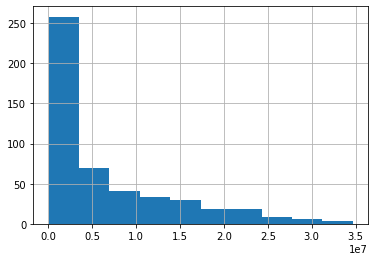

In [6]:
import matplotlib.pyplot as plt
# Plot a histogram of salaries
nba['Salary'].hist()
plt.show()


We will now calculate IQR for Salary column and use it to identify the outliers and apply top-coding and bottom-coding technique to replace them with edge values

In [7]:
Q1 = nba['Salary'].quantile(0.25)
Q3 = nba['Salary'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the acceptable range (fences)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Top code the salaries to upper bound
nba.loc[nba['Salary'] >= upper_bound, 'Salary'] = upper_bound

# Bottom code the salaries to lower bound
nba.loc[nba['Salary'] <= lower_bound, 'Salary'] = lower_bound



Let us now visualize the updated histogram

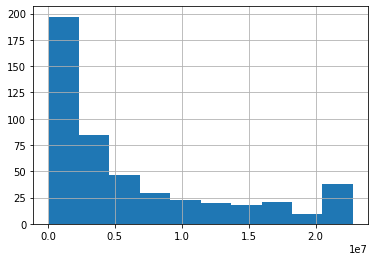

In [8]:
nba['Salary'].hist()
plt.show()


### Sampling from the same probability distribution and pseudonymizing a categorical attribute


Sometimes, some attributes make the dataset more identifiable. We can use probability distribution along with sampling technique to reduce that risk and pseudonymize the dataset. Let us first see the probability distribution of a specific categorical attribute

In [9]:
# Print the probability distribution of each unique value
print(nba["Tm"].value_counts(normalize=True))

TOT    0.113402
DAL    0.037113
UTA    0.035052
MEM    0.035052
ATL    0.032990
PHI    0.032990
IND    0.032990
GSW    0.032990
MIA    0.030928
SAS    0.030928
MIL    0.030928
BOS    0.030928
ORL    0.030928
LAL    0.030928
CHO    0.028866
NYK    0.028866
NOP    0.028866
PHO    0.028866
OKC    0.028866
DEN    0.028866
POR    0.028866
CHI    0.028866
DET    0.028866
WAS    0.026804
HOU    0.026804
MIN    0.026804
TOR    0.026804
BRK    0.024742
LAC    0.024742
SAC    0.024742
CLE    0.020619
Name: Tm, dtype: float64


Let us visualize the distribution with bar plot


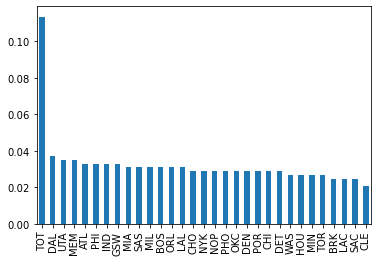

In [10]:
import matplotlib.pyplot as plt
# Generate a bar plot of the value counts
nba["Tm"].value_counts(normalize=True).plot(kind="bar")
plt.show()

We will now use sampling technique to pseudonymize this categorical column

In [11]:
import numpy as np
# Obtain the probability distribution counts 
counts = nba["Tm"].value_counts(normalize=True)

# Get the probability distribution values 
distributions = counts.values

# Sample from the calculated probability distributions
nba["Tm"] = np.random.choice(counts.index, 
                                    p=distributions, 
                                    size=len(nba["Tm"]))

# See the resulting DataFrame
print(nba.head())

             Player    Salary NBA_Country  NBA_DraftNumber  Age   Tm  G    MP  \
0     Robert Wilson    815615       China               43   22  UTA  0    87   
1       Jason Smith   3477600     Georgia               42   33  GSW  1   937   
2    Victor Bridges  12307692         USA               19   36  NOP  1  1508   
3  Gregory Bautista   3202217         USA               13   22  PHO  0   656   
4   Michael Stewart   3057240         USA               10   20  ATL  1   979   

    PER    TS%  ...  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP     ssn  \
0   0.6  0.303  ... -0.4  0.1 -0.2 -0.121 -10.6   0.5 -10.1  -0.2  0****7   
1  16.8  0.608  ...  1.7  1.4  3.1  0.160  -0.6   1.3   0.8   0.7  6****9   
2  17.3  0.529  ...  0.3  1.1  1.4  0.046  -0.6  -1.3  -1.9   0.0  6****1   
3  14.6  0.499  ... -0.1  0.5  0.4  0.027  -0.7  -2.0  -2.6  -0.1  6****9   
4   8.2  0.487  ... -0.4  1.2  0.8  0.038  -3.7   0.9  -2.9  -0.2  5****4   

       email  
0  R****info  
1  J****.org  
2  V*

### Applying similar distributions and pseudonymizing a continuous attribute


We can also pseudonymize a continuous attribute by applying the distribution function that closely resembles it. Let us first visualize the density plot of Salary attribute of the dataset.

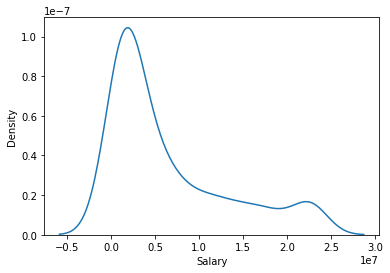

In [12]:
import seaborn as sns
sns.kdeplot(nba['Salary'])
plt.show()

This is a plot that closely resembles exponential normal disribution. We will generate similar distribution by extracting necessary parameters from the attribute and generate values that resemble the distribution

In [13]:
# Import stats from scipy
from scipy import stats

# Fit the exponnorm distribution to the continuous variable monthly income
params = stats.distributions.exponnorm.fit(nba["Salary"])

# Sample from the exponnorm distribution and replace monthly income
nba['Salary'] = stats.exponnorm.rvs(size=len(nba.index), *params)

# Round the salaries to their closest integer
nba['Salary'] = nba['Salary'].round()

# See the resulting dataset
print(nba.head())

             Player     Salary NBA_Country  NBA_DraftNumber  Age   Tm  G  \
0     Robert Wilson   596876.0       China               43   22  UTA  0   
1       Jason Smith  6797420.0     Georgia               42   33  GSW  1   
2    Victor Bridges  5112443.0         USA               19   36  NOP  1   
3  Gregory Bautista  4640720.0         USA               13   22  PHO  0   
4   Michael Stewart  5985435.0         USA               10   20  ATL  1   

     MP   PER    TS%  ...  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  \
0    87   0.6  0.303  ... -0.4  0.1 -0.2 -0.121 -10.6   0.5 -10.1  -0.2   
1   937  16.8  0.608  ...  1.7  1.4  3.1  0.160  -0.6   1.3   0.8   0.7   
2  1508  17.3  0.529  ...  0.3  1.1  1.4  0.046  -0.6  -1.3  -1.9   0.0   
3   656  14.6  0.499  ... -0.1  0.5  0.4  0.027  -0.7  -2.0  -2.6  -0.1   
4   979   8.2  0.487  ... -0.4  1.2  0.8  0.038  -3.7   0.9  -2.9  -0.2   

      ssn      email  
0  0****7  R****info  
1  6****9  J****.org  
2  6****1  V****.com  


Let us now visualize the density plot of the generated Salary column


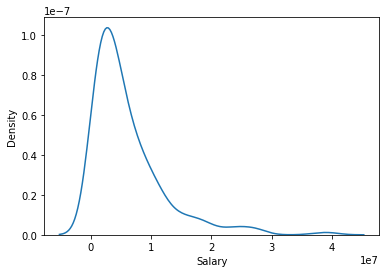

In [14]:
sns.kdeplot(nba['Salary'])
plt.show()

### Generalizing into ranges


Sometimes unique combinations of multiple columns gives away information about a persons PII. We will generalize the data in a way so that the value of age falls into an interval rather than specific value. First, let us visualize the number of unique combinations of Age and Country

In [15]:
# Print how many unique combinations are for age and nba_origin
print(nba.groupby(["Age","NBA_Country"]).size().reset_index(name="count"))

     Age NBA_Country  count
0     19      France      1
1     19         USA      6
2     20      Canada      1
3     20     Croatia      2
4     20     Finland      1
..   ...         ...    ...
114   38         USA      1
115   39     Germany      1
116   40   Argentina      1
117   40         USA      1
118   41         USA      1

[119 rows x 3 columns]


We will now create 4 age  groups and anonymize the age column by generalizing it

In [16]:
# Generalize age by creating 4 groups of intervals
nba['age_group'] = pd.cut(nba['Age'], bins=4)

# Print the first 10 rows
print(nba.head(10))

                  Player      Salary NBA_Country  NBA_DraftNumber  Age   Tm  \
0          Robert Wilson    596876.0       China               43   22  UTA   
1            Jason Smith   6797420.0     Georgia               42   33  GSW   
2         Victor Bridges   5112443.0         USA               19   36  NOP   
3       Gregory Bautista   4640720.0         USA               13   22  PHO   
4        Michael Stewart   5985435.0         USA               10   20  ATL   
5          Daniel Garner   5813331.0         USA               62   24  TOT   
6          Daniel Bowman  23489227.0         USA               62   30  UTA   
7              Terry Lee   4868305.0      Canada               62   23  BRK   
8  Christopher Hernandez   2264602.0         USA               23   30  DAL   
9             Luis Burke   4247280.0       Spain               35   23  IND   

   G    MP   PER    TS%  ...  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP     ssn  \
0  0    87   0.6  0.303  ...  0.1 -0.2 -0.121 -10

### Generalization Through Hierarchy


We will further generalize the NBA_Country column by moving the information to a more generalized information, from country to continent

In [17]:
origin_hierarchy = {'Czech Republic': 'Europe',
 'France': 'Europe',
 'Georgia': 'Europe',
 'Spain': 'Europe',
 'Russia': 'Europe',
 'Switzerland': 'Europe',
 'Germany': 'Europe',
 'Canada': 'America',
 'USA': 'America',
 'Democratic Re_': 'America',
 'Haiti': 'America',
 'Brazil': 'America'}



Let us see the no of unique combination of age group and country


In [18]:

# Calculate how many unique combinations are for age and nba_origin
df_count = nba.groupby(['age_group', 'NBA_Country']).size().reset_index(name='count')

df_count.head()


,age_group,NBA_Country,count
0,"(18.978, 24.5]",Argentina,1
1,"(18.978, 24.5]",Australia,2
2,"(18.978, 24.5]",Austria,1
3,"(18.978, 24.5]",Bahamas,1
4,"(18.978, 24.5]",Bosnia,0


We can easily identify some people based on the little available information on them.


In [19]:
k = 3

# Filter the rows that have count from 0 to less than k
df_count[(df_count['count'] > 0)  & (df_count['count'] < k)] 

,age_group,NBA_Country,count
0,"(18.978, 24.5]",Argentina,1
1,"(18.978, 24.5]",Australia,2
2,"(18.978, 24.5]",Austria,1
3,"(18.978, 24.5]",Bahamas,1
5,"(18.978, 24.5]",Bosnia & Herz...,1
6,"(18.978, 24.5]",Brazil,1
7,"(18.978, 24.5]",Cameroon,2
9,"(18.978, 24.5]",China,1
12,"(18.978, 24.5]",Democratic Re...,1
14,"(18.978, 24.5]",Dominican Rep...,1


After generalization, the information becomes harder to track


In [20]:

# Apply origin_hierarchy hierarchy generalization to nba_origin
nba['nba_origin_generalized'] = nba['NBA_Country'].map(origin_hierarchy)

# Filter the rows that have count from 0 to less than k
df_count = nba.groupby(['age_group', 'nba_origin_generalized']).size().reset_index(name='count')
print(df_count[(df_count['count'] > 0) & (df_count['count'] < k)] )

Empty DataFrame
Columns: [age_group, nba_origin_generalized, count]
Index: []


### Histograms with differential privacy


While visualizing the distribution through histograms, we can add some noise through differential privacy with the help of epsilon. Smaller values of epsilon means more privacy and more noise and less accuracy. Let us first visualize the original histogram.

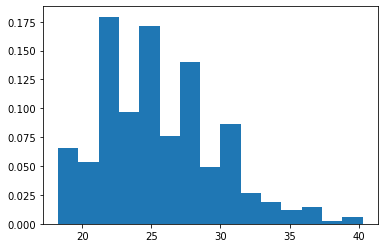

In [21]:
import numpy as np
import matplotlib.pyplot as plt
ages = nba["Age"]
# Get counts and bars for non-private histogram of ages
counts, bins = np.histogram(ages, bins='auto')

# Normalize counts to get proportions
proportions = counts/counts.sum()

# Draw the histogram of proportions
plt.bar(bins[: - 1], height=proportions, width=(bins[1] - bins[0]))
plt.show()

Let us visualize the histogram with a low epsilon


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\diffprivlib\tools\histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


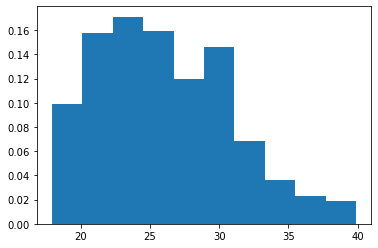

In [22]:
from diffprivlib import tools
# Get counts and bars for private histogram of ages
dp_counts, dp_bins = tools.histogram(ages, epsilon=0.1)

# Normalize counts to get proportions
dp_proportions = dp_counts/dp_counts.sum()

# Draw the histogram of proportions and see differences
plt.bar(dp_bins[:-1], dp_proportions, width=(dp_bins[1] - dp_bins[0]))
plt.show()

Let us now see the effect of increased epsilon


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\diffprivlib\tools\histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


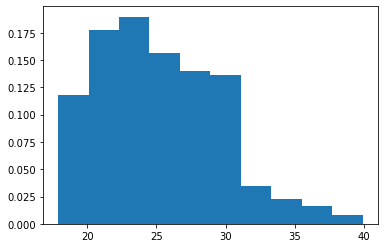

In [23]:
# Get counts and bars for private histogram of ages with epsilon of 1
from diffprivlib import tools
dp_counts, dp_bins = tools.histogram(ages, epsilon=1)

# Normalize counts to get proportions
dp_proportions = dp_counts/dp_counts.sum()

# Draw the histogram of proportions and see differences
plt.bar(dp_bins[:-1], dp_proportions, width=(dp_bins[1] - dp_bins[0]))
plt.show()

### Using privacy budgets


We will use privacy budget so that a person cannot request the anonymous data too many times to later remove the layers of epsilon privacy through bootstrapping. We will allocate the budget to let the third party accrue the information a limited number of times.

In [24]:
from diffprivlib import BudgetAccountant
# Initialize budget accountant with epsilon of 1.2
acc = BudgetAccountant(epsilon=1.2)

# Calculate private mean of ages
dp_mean = tools.mean(ages, epsilon=0.5, accountant=acc) # epsilon exceeding budget will throw an exception

# Print the resulting private mean 
print("Private mean: ", dp_mean)

# Obtain the total privacy spent
print("The total privacy spent is: ", acc.total())

# Obtain the remaining for 1 query
print("The remaining budget is: ", acc.remaining())

# Show privacy budget remaining for 2 queries
print("Remaining budget for 2 queries: ", acc.remaining(2))
print("Number of queries recorded: ", len(acc))


Private mean:  26.255566059555168
The total privacy spent is:  (epsilon=0.5, delta=0.0)
The remaining budget is:  (epsilon=0.7, delta=1.0)
Remaining budget for 2 queries:  (epsilon=0.35, delta=1.0)
Number of queries recorded:  1


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\diffprivlib\tools\utils.py:276: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Let us create a helper function to show the histogram of distribution with differential privacy. We will use this helper function later to see the histogram of data within a specified range after consuming a portion of allocated budget of differential privacy.

In [25]:

def show_histogram(dp_counts, dp_bins):
    
    # Normalize counts to get proportions
    dp_proportions = dp_counts/dp_counts.sum()
    
    # Draw the histogram of proportions and see differences
    plt.bar(dp_bins[:-1], dp_proportions, width=(dp_bins[1] - dp_bins[0]))
    plt.show()

Let us try to see the histogram distribution through using privacy budget


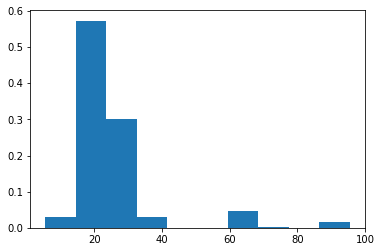

Mean:  26.23426623008704


In [26]:
ages = nba["Age"]
# Create the privacy Budget Accountant with epsilon of 1.5
acc = BudgetAccountant(epsilon=1.5)

# Use the Budget Accountant acc to draw a private histogram of ages with epsilon 0.1
dp_hist, dp_bins = tools.histogram(ages, epsilon=0.1, range=[10,100], accountant=acc)
show_histogram(dp_hist, dp_bins)

# Get and show the private average of the age variable
print("Mean: ", tools.mean(ages, epsilon=0.9, bounds=(10,100)) )

